<a href="https://colab.research.google.com/github/myutiee/3AI1_Mutia_0110224131/blob/main/Praktikum_mandiri_10_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/Praktikum_10/Data/weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
#ubah kolom numerik
replacements = {
    'Cloud Cover': {'partly cloudy':0, 'clear':1, 'overcast':2, 'cloudy':3},
    'Season': {'Winter':0, 'Spring':1, 'Summer':2, 'Autumn':3},
    'Location': {'inland':0, 'mountain':1, 'coastal':2},
    'Weather Type': {'Rainy': 0, 'Cloudy':1, 'Sunny':2, 'Snowy':3}
}
df = df.replace(replacements, inplace=False)
df.head()

/tmp/ipython-input-48936954.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(replacements, inplace=False)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0,0
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,1,2
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2,2
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,0


In [6]:
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X)

#Standarscaler
X_scaled_df = pd.DataFrame(X_scaled_numerical, columns=X.columns, index=X.index)
print(X_scaled_df.head())

   Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0    -0.294931  0.212404   -0.048086           0.887629    -1.242178   
1     1.143035  1.351385   -0.192836           0.543291    -1.242178   
2     0.625367 -0.233285   -0.409962          -1.178401    -0.187860   
3     1.085516  0.707613   -1.206089           0.887629    -0.187860   
4     0.452811  0.261924    1.037543           0.386773     0.866458   

   Atmospheric Pressure  UV Index    Season  Visibility (km)  Location  
0              0.134203 -0.520104 -0.982996        -0.582231 -1.144250  
1              0.150602  0.776424 -0.122663         1.345768 -1.144250  
2              0.346579  0.257813 -0.122663         0.010999  0.119163  
3              0.549008  0.776424 -0.122663        -1.323769  1.382576  
4             -0.407490 -0.779410 -0.982996        -0.878846  0.119163  


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.3, random_state=42, stratify=y
)


In [8]:
# Menentukan rentang nilai k yang akan diuji
param_grid = {'n_neighbors': np.arange(1, 31)}

# Menggunakan GridSearchCV untuk mencari k optimal
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mendapatkan nilai k optimal
optimal_k = grid_search.best_params_['n_neighbors']
print(f'Optimal k for KNN: {optimal_k}')

# melatih pemodelan dengan knn menggunakan optimal_k
model_knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
model_knn_final.fit(X_train, y_train)


Optimal k for KNN: 1


KNeighborsClassifier(n_neighbors=np.int64(1))

In [9]:
# Tampilkan Akurasi
n_neighbors = optimal_k
y_pred_final = model_knn_final.predict(X_test)
accuracy = model_knn_final.score(X_test, y_test)
print(f"Akurasi dengan KNN (k={n_neighbors}): {accuracy:.4f}")

Akurasi dengan KNN (k=1): 0.8949


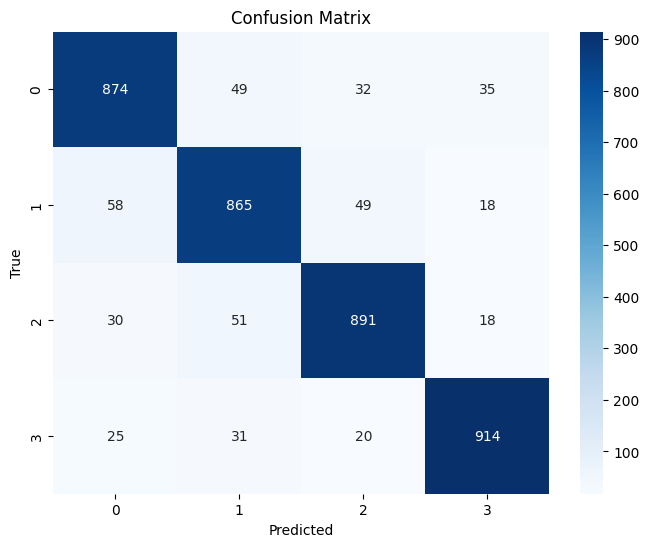

In [10]:
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [12]:
class_names = list(replacements['Weather Type'].keys())
print(classification_report(y_test, y_pred_final, target_names=class_names))

              precision    recall  f1-score   support

       Rainy       0.89      0.88      0.88       990
      Cloudy       0.87      0.87      0.87       990
       Sunny       0.90      0.90      0.90       990
       Snowy       0.93      0.92      0.93       990

    accuracy                           0.89      3960
   macro avg       0.90      0.89      0.89      3960
weighted avg       0.90      0.89      0.89      3960



In [13]:
print("Before SMOTE:")
print(y_train.value_counts())

sm = SMOTE (random_state=42, k_neighbors=1)
x_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print("After SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
Weather Type
0    2310
2    2310
3    2310
1    2310
Name: count, dtype: int64
After SMOTE:
Weather Type
0    2310
2    2310
3    2310
1    2310
Name: count, dtype: int64


In [14]:
param_grid = {
    'n_neighbors': list (range(1,31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train_smote, y_train_smote)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best score: 0.895021645021645


In [15]:
cv_scores = cross_val_score(grid.best_estimator_, x_train_smote, y_train_smote, cv=5)
print("Cross Validation Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross Validation Accuracy: 0.895021645021645
Std Dev: 0.0068018425811561456


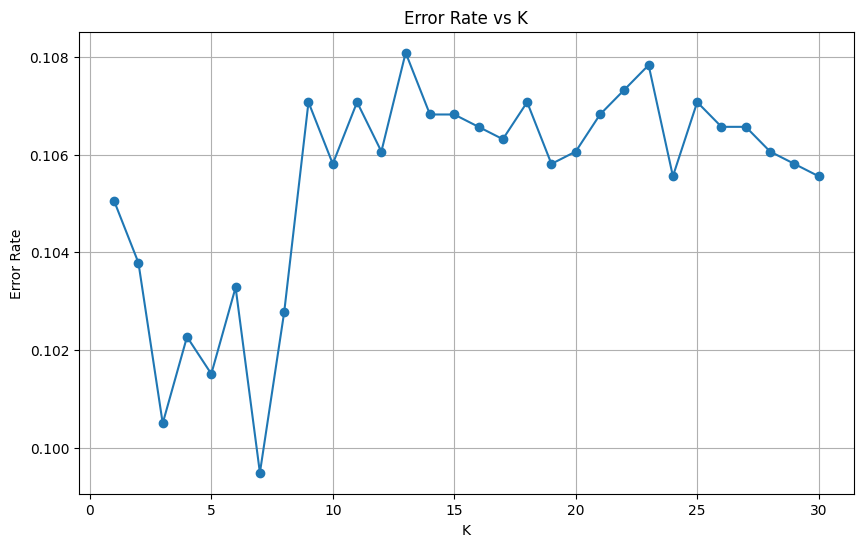

In [16]:
errors = []

for k in range(1, 31):
  knn_temp = KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(x_train_smote, y_train_smote)
  pred = knn_temp.predict(X_test)
  errors.append(np.mean(pred != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1,31), errors, marker='o')
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K")
plt.grid(True)
plt.show()